In [187]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns
from sklearn.metrics import r2_score
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import RidgeCV





In [188]:
constant = 1e-6

In [189]:
def mean_absolute_pct_error(y_true, y_pred):

    y_true, y_pred = np.array(y_true), np.array(y_pred)
    mask = y_true != 0
    return np.mean(np.abs((y_true[mask] - y_pred[mask]) / y_true[mask])) * 100

In [190]:
#df2 = pd.read_csv("neic_earthquakes_medium_second.csv")

In [191]:
df = pd.read_csv("neic_earthquakes_medium.csv")

In [192]:
df.shape

(19674, 22)

In [193]:
df

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
0,2022-12-31T23:09:41.190Z,33.403667,-116.379333,4.70,0.62,ml,17,80.00,0.071420,0.1500,...,2023-01-25T18:14:03.636Z,"16km N of Borrego Springs, CA",earthquake,0.24,0.76,0.190,10.0,reviewed,ci,ci
1,2022-12-31T23:03:27.530Z,33.398333,-116.370000,6.61,0.58,ml,18,91.00,0.061970,0.1700,...,2023-01-25T15:20:30.759Z,"16km N of Borrego Springs, CA",earthquake,0.27,0.86,0.078,11.0,reviewed,ci,ci
2,2022-12-31T23:01:15.810Z,33.401833,-116.376667,5.07,0.92,ml,24,80.00,0.068540,0.1600,...,2023-01-25T18:11:15.420Z,"16km N of Borrego Springs, CA",earthquake,0.32,0.79,0.151,17.0,reviewed,ci,ci
3,2022-12-31T22:36:09.500Z,38.804167,-122.813667,3.65,0.56,md,10,141.00,0.013000,0.0100,...,2023-01-10T05:36:13.516Z,"6km WNW of The Geysers, CA",earthquake,0.61,0.67,NaN,1.0,reviewed,nc,nc
4,2022-12-31T22:26:12.450Z,34.092000,-116.425667,6.90,1.01,ml,15,77.00,0.037310,0.0700,...,2023-01-25T21:31:14.223Z,"2km SSE of Yucca Valley, CA",earthquake,0.19,0.25,0.198,22.0,reviewed,ci,ci
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19669,2022-06-15T02:05:04.280Z,38.840168,-122.810165,2.08,0.97,md,10,60.00,0.015580,0.0100,...,2022-06-15T02:41:20.913Z,"8km WNW of Cobb, CA",earthquake,0.32,1.04,0.610,2.0,automatic,nc,nc
19670,2022-06-15T01:37:47.470Z,35.819667,-117.639167,8.93,0.97,ml,16,82.00,0.034080,0.1300,...,2022-06-15T17:29:15.130Z,"22km WNW of Searles Valley, CA",earthquake,0.23,0.50,0.204,6.0,reviewed,ci,ci
19671,2022-06-15T01:19:05.849Z,38.486900,-117.930800,0.50,1.50,ml,14,69.13,0.184000,0.1438,...,2022-06-16T02:38:55.212Z,"18 km NE of Mina, Nevada",earthquake,NaN,8.70,0.430,6.0,reviewed,nn,nn
19672,2022-06-15T00:17:39.450Z,38.834667,-122.759163,1.08,0.70,md,8,163.00,0.009384,0.0200,...,2022-06-15T00:28:11.115Z,"3km WNW of Cobb, CA",earthquake,0.39,0.58,0.160,2.0,automatic,nc,nc


In [194]:
i = 0
for col in df:
  i = i+1
  print(col)
  print(i)

time
1
latitude
2
longitude
3
depth
4
mag
5
magType
6
nst
7
gap
8
dmin
9
rms
10
net
11
id
12
updated
13
place
14
type
15
horizontalError
16
depthError
17
magError
18
magNst
19
status
20
locationSource
21
magSource
22


In [195]:
#df = pd.concat([df, df2], ignore_index=True)

In [196]:
df2 = df
df2 = df2.drop(['time', 'magType', 'updated', 'place','id', 'type', 'status', 'locationSource', 'magSource', 'net'], axis=1)
#sns.pairplot(df2)

In [197]:
df = df.dropna()
###
columns_to_transform = ['depth','nst','gap','dmin','magNst','horizontalError','depthError','magError']

for col in columns_to_transform:
    df[col] = np.log(df[col] + constant)

df = df.dropna()
y = df['mag']
y = np.log(df['mag'])

###



/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
<ipython-input-197-35d14aa460a6>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = np.log(df[col] + constant)


In [198]:
X = df.drop(['mag', 'time', 'magType', 'updated', 'place','id', 'type', 'status', 'locationSource', 'magSource', 'net'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

train_offset = np.ones((X_train.shape[0], 1))
X_train = np.concatenate((train_offset, X_train), axis=1)
test_offset = np.ones((X_test.shape[0], 1))
X_test = np.concatenate((test_offset, X_test), axis=1)

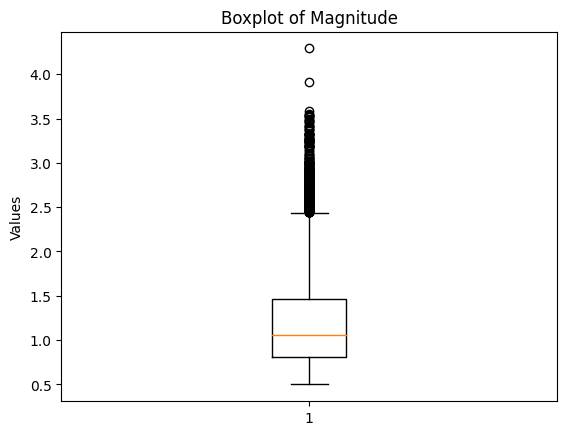

In [199]:
plt.figure()
plt.boxplot(df['mag'])
plt.title('Boxplot of Magnitude')
plt.ylabel('Values')
plt.show()

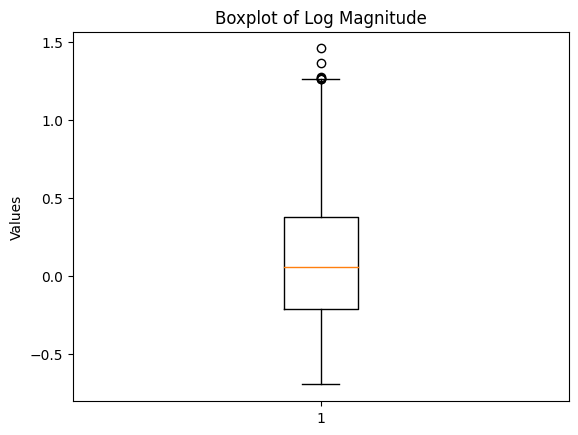

In [200]:
plt.figure()
plt.boxplot(np.log(df['mag']))
plt.title('Boxplot of Log Magnitude')
plt.ylabel('Values')
plt.show()



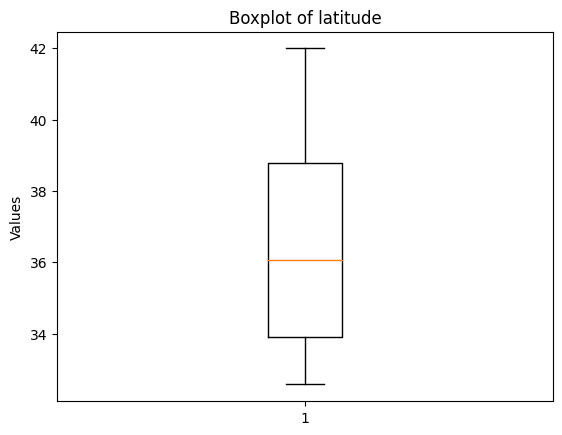

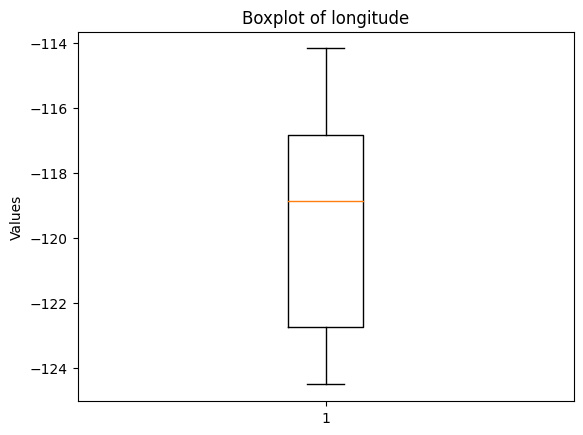

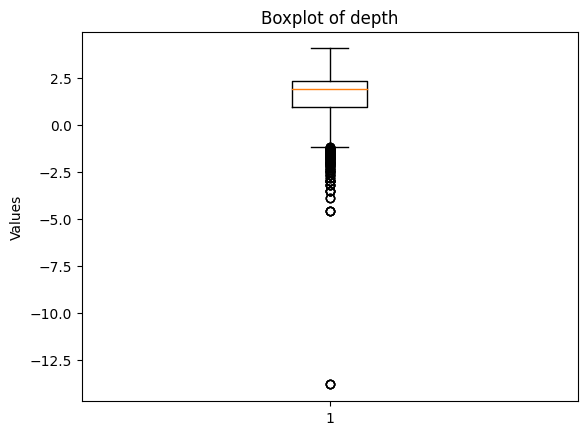

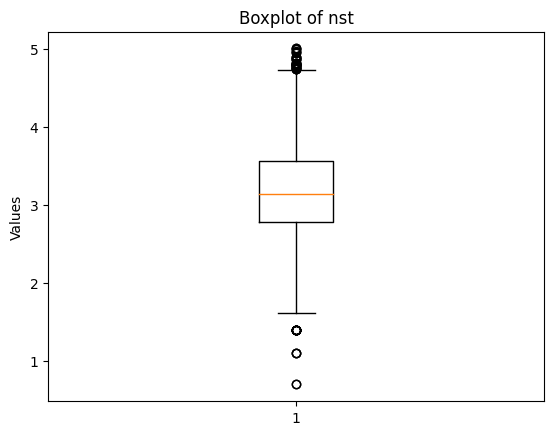

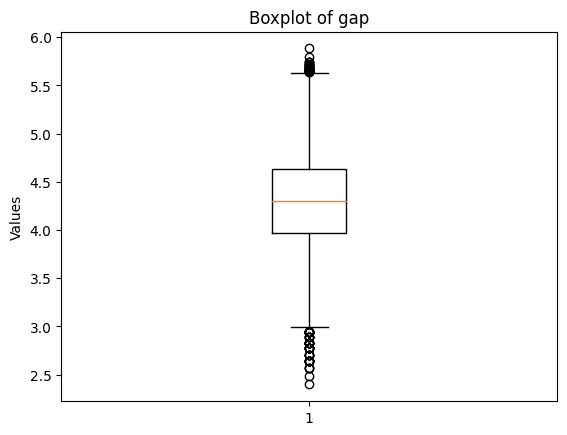

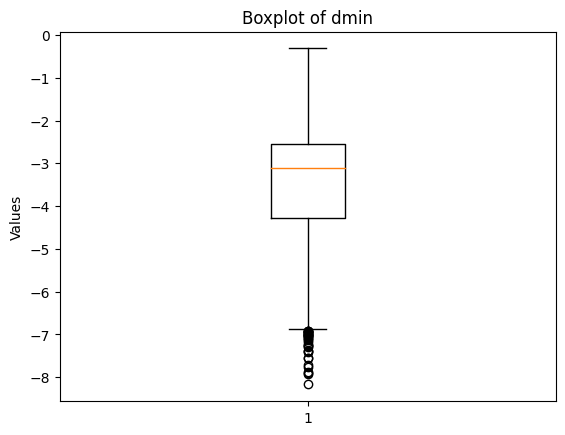

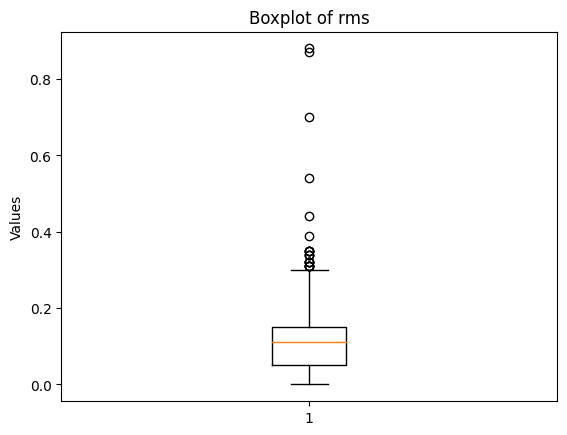

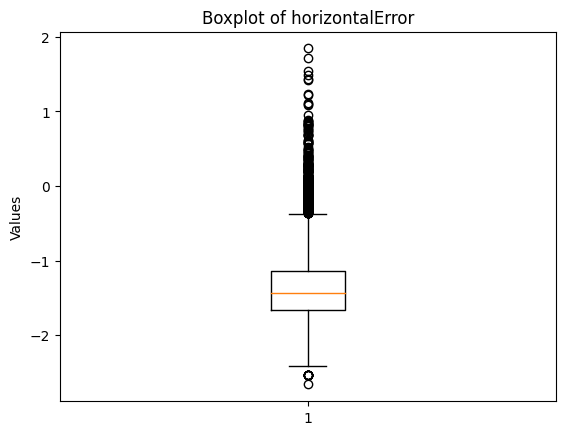

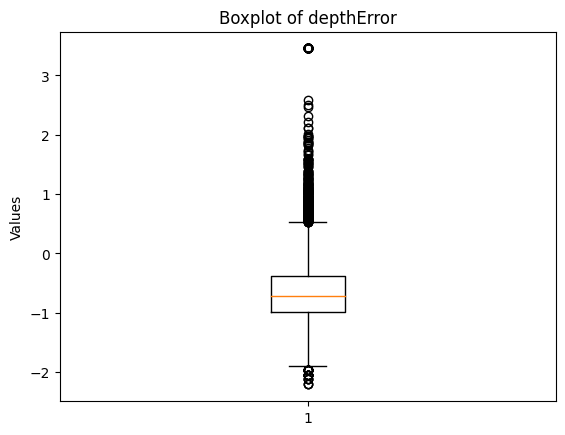

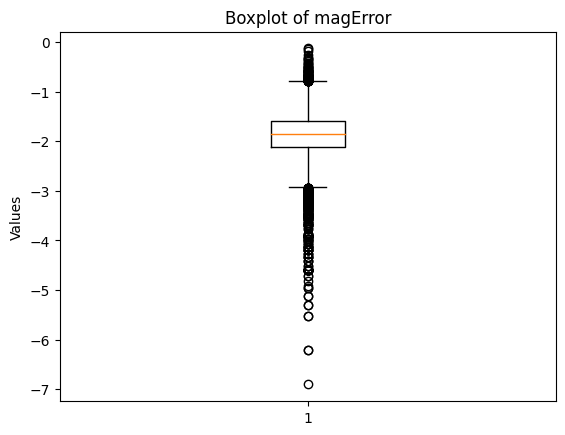

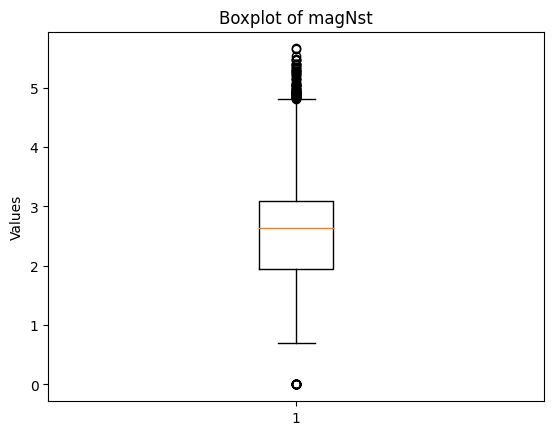

In [201]:
for col in X.columns:
    plt.figure()
    plt.boxplot(df[col])
    plt.title(f'Boxplot of {col}')
    plt.ylabel('Values')
    plt.show()

In [202]:
def runmodel(model, x_train, y_train, x_test, y_test):
  model.fit(x_train, y_train)
  y_pred = model.predict(x_test)
  train_pred = model.predict(x_train)

  mse_test = mean_squared_error(y_test, y_pred)
  mse_train = mean_squared_error(y_train, train_pred)
  return model, mse_train, mse_test, y_pred, y_test, y_train, train_pred

In [203]:
model = LinearRegression(fit_intercept=False)
model_res, mse_train, mse_test, y_pred, y_test, y_train, train_pred = runmodel(model, X_train, y_train, X_test, y_test)
print(f'MAPE: {mean_absolute_pct_error(y_test, y_pred)}')
print(f'R_squared: {r2_score(y_test, y_pred)}')
print(f'rootMean squared error train: {np.sqrt(mse_train)}')
print(f'rootMean squared error test: {np.sqrt(mse_test)}')


MAPE: 144.70858360949947
R_squared: 0.6126074801113798
rootMean squared error train: 0.25530043383500833
rootMean squared error test: 0.25556553486980244


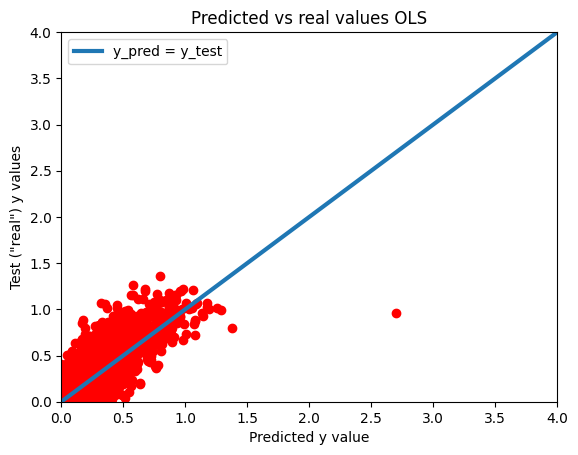

In [204]:
xs = np.linspace(0, 4, 400)
ys = np.linspace(0, 4, 400)
fig, ax = plt.subplots()
ax.scatter(y_pred, y_test, color='red')
ax.plot(xs, ys, label='y_pred = y_test', lw=3)
ax.set_xlabel('Predicted y value')
ax.set_ylabel('Test ("real") y values')
plt.title("Predicted vs real values OLS")
ax.set_xlim(0, 4)
ax.set_ylim(0, 4)
ax.legend()

                 latitude  longitude     depth       nst       gap      dmin  \
latitude         1.000000  -0.933110 -0.453878 -0.368944  0.191741 -0.418088   
longitude       -0.933110   1.000000  0.431475  0.296945 -0.134305  0.499990   
depth           -0.453878   0.431475  1.000000  0.263495 -0.029153  0.492236   
nst             -0.368944   0.296945  0.263495  1.000000 -0.626461  0.155718   
gap              0.191741  -0.134305 -0.029153 -0.626461  1.000000  0.098941   
dmin            -0.418088   0.499990  0.492236  0.155718  0.098941  1.000000   
rms             -0.711630   0.701147  0.459621  0.442827 -0.178472  0.538607   
horizontalError  0.225223  -0.189569  0.027074 -0.673652  0.689914  0.035411   
depthError       0.068124   0.004687 -0.009399 -0.461453  0.347415  0.313917   
magError         0.062679  -0.068898  0.015919 -0.013301 -0.008799 -0.004837   
magNst          -0.304887   0.288695  0.372227  0.676415 -0.322018  0.379942   

                      rms  horizontalEr

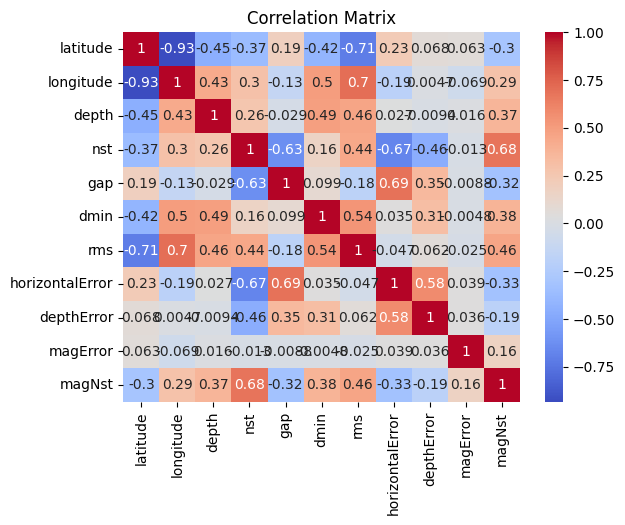

In [205]:
corr_matrix = X.corr()
print(corr_matrix)
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [206]:
from sklearn.preprocessing import PolynomialFeatures

polynomial_features = PolynomialFeatures(degree=3)
x_train_poly = polynomial_features.fit_transform(X_train)
x_test_poly = polynomial_features.fit_transform(X_test)

model_poly = LinearRegression(fit_intercept=False)
model_res, mse_train, mse_test, y_pred, y_test, y_train, train_pred = runmodel(model_poly, x_train_poly, y_train, x_test_poly, y_test)
print(f'MAPE: {mean_absolute_pct_error(y_test, y_pred)}')
print(f'rootMean squared error train: {np.sqrt(mse_train)}')
print(f'rootMean squared error test: {np.sqrt(mse_test)}')



MAPE: 128.5060635078759
rootMean squared error train: 0.19247079328838765
rootMean squared error test: 0.2650693483984301


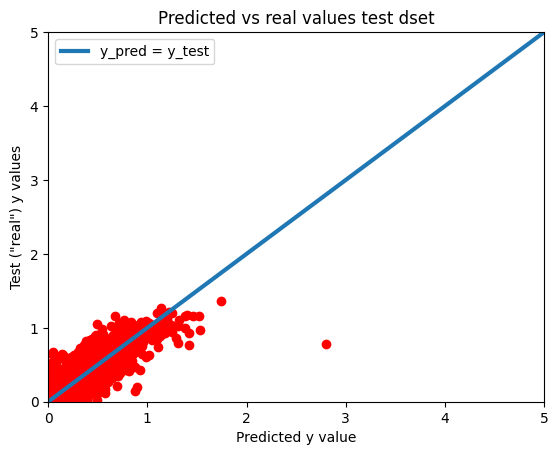

In [207]:
xs = np.linspace(0, 5, 400)
ys = np.linspace(0, 5, 400)
fig, ax = plt.subplots()
ax.scatter(y_pred, y_test, color='red')
ax.plot(xs, ys, label='y_pred = y_test', lw=3)
ax.set_xlabel('Predicted y value')
ax.set_ylabel('Test ("real") y values')
plt.title("Predicted vs real values test dset")
ax.set_xlim(0, 5)
ax.set_ylim(0, 5)
ax.legend()

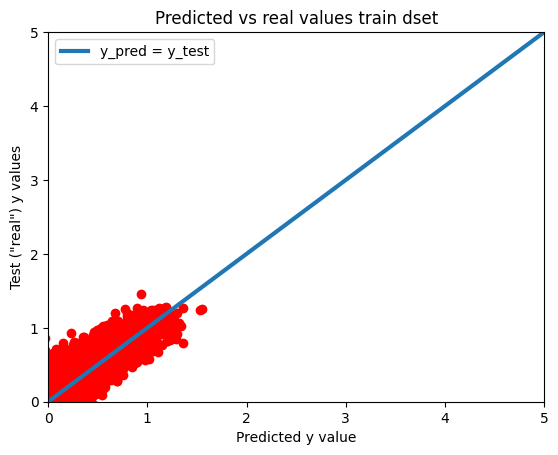

In [208]:
xs = np.linspace(0, 6, 400)
ys = np.linspace(0, 6, 400)
fig, ax = plt.subplots()
ax.scatter(train_pred, y_train, color='red')
ax.plot(xs, ys, label='y_pred = y_test', lw=3)
ax.set_xlabel('Predicted y value')
ax.set_ylabel('Test ("real") y values')
plt.title("Predicted vs real values train dset")
ax.set_xlim(0, 5)
ax.set_ylim(0, 5)
ax.legend()

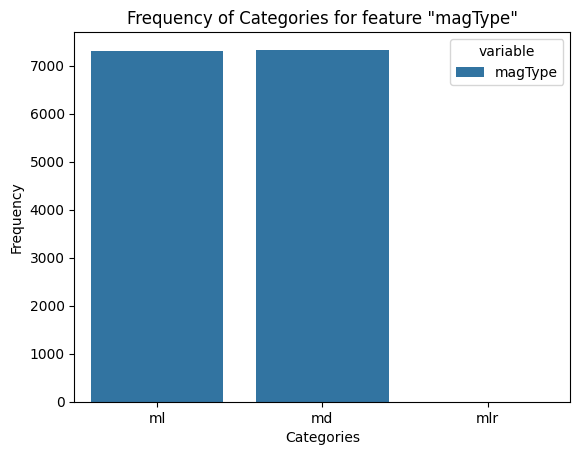

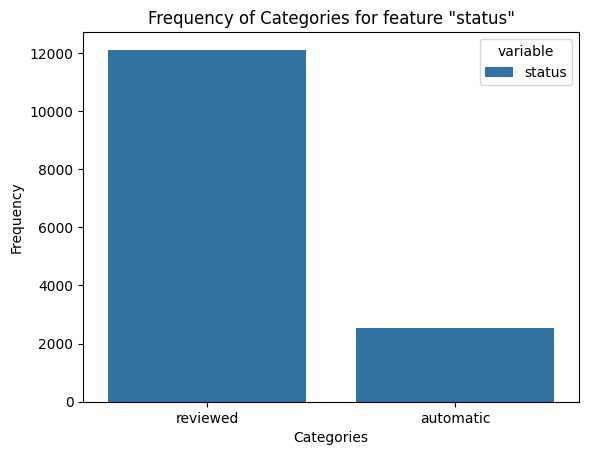

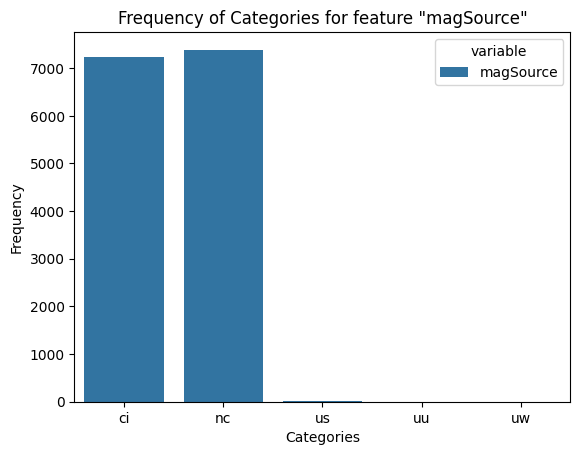

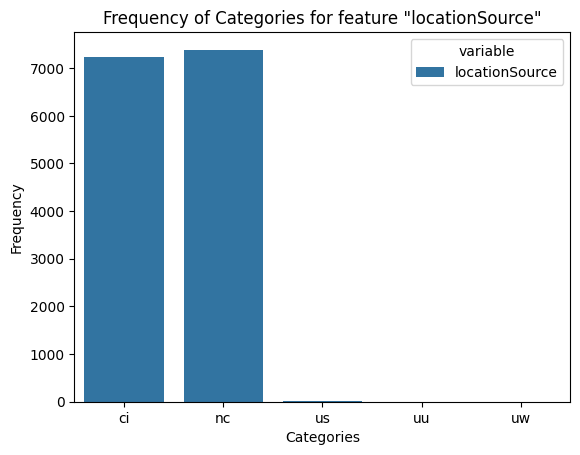

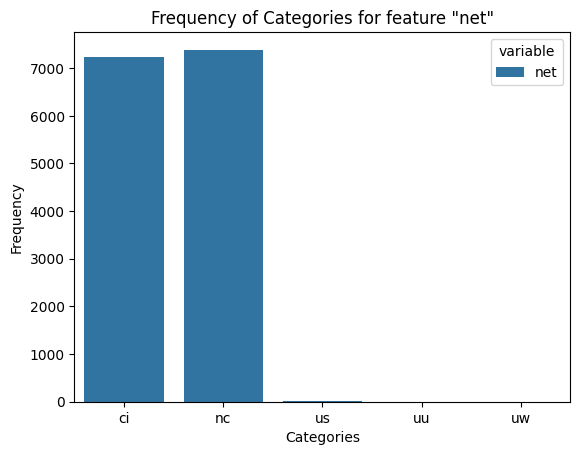

In [209]:
cat = ['magType','status','magSource','locationSource', 'net']

for c in cat:
  long_df = df.melt(value_vars=[c])

  sns.countplot(data=long_df, x='value', hue='variable')
  plt.title(f'Frequency of Categories for feature "{c}"')
  plt.xlabel('Categories')
  plt.ylabel('Frequency')
  plt.show()


In [210]:
df = df.dropna()
y = np.log(df['mag']) #####CHANGE MAYBE
X = df.drop(['mag', 'time', 'updated', 'place','id', 'type'], axis=1)
#dummies magtype, status, magsource, location source, net
X = pd.get_dummies(X)
#X = X.drop(['net_us', 'net_uw', 'net_uu','locationSource_us','locationSource_uw', 'locationSource_uu', 'magType_mlr', 'magSource_uu', 'magSource_uw', 'magSource_us'], axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
for c in X:
  print(c)

latitude
longitude
depth
nst
gap
dmin
rms
horizontalError
depthError
magError
magNst
magType_md
magType_ml
magType_mlr
net_ci
net_nc
net_us
net_uu
net_uw
status_automatic
status_reviewed
locationSource_ci
locationSource_nc
locationSource_us
locationSource_uu
locationSource_uw
magSource_ci
magSource_nc
magSource_us
magSource_uu
magSource_uw


LInear regression good model

In [211]:
model = LinearRegression(fit_intercept=False)
model_res, mse_train, mse_test, y_pred, y_test, y_train, train_pred = runmodel(model, X_train, y_train, X_test, y_test)
print(f'MAPE: {mean_absolute_pct_error(y_test, y_pred)}')
print(f'R_squared: {r2_score(y_test, y_pred)}')
print(f'rootMean squared error train: {np.sqrt(mse_train)}')
print(f'rootMean squared error test: {np.sqrt(mse_test)}')

MAPE: 149.52254903199392
R_squared: 0.611956775639912
rootMean squared error train: 0.2533193861870083
rootMean squared error test: 0.2523516577084037


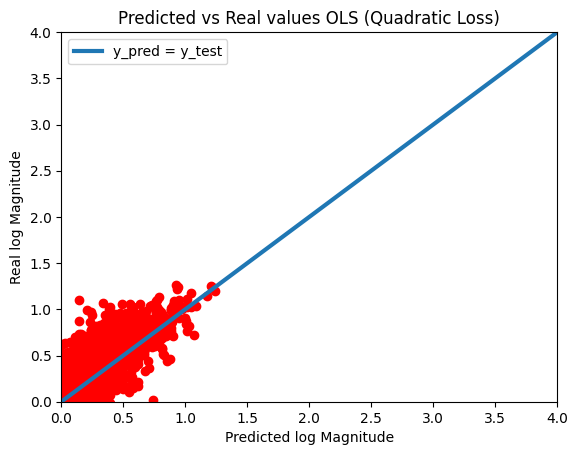

In [212]:
xs = np.linspace(0, 6, 400)
ys = np.linspace(0, 6, 400)
fig, ax = plt.subplots()
ax.scatter(y_pred, y_test, color='red')
ax.plot(xs, ys, label='y_pred = y_test', lw=3)
ax.set_xlabel('Predicted log Magnitude')
ax.set_ylabel('Real log Magnitude')
plt.title("Predicted vs Real values OLS (Quadratic Loss)")
ax.set_xlim(0, 4)
ax.set_ylim(0, 4)
ax.legend()

In [213]:
from sklearn.preprocessing import PolynomialFeatures

polynomial_features = PolynomialFeatures(degree=3)
x_train_poly = polynomial_features.fit_transform(X_train)
x_test_poly = polynomial_features.fit_transform(X_test)

model_poly = LinearRegression(fit_intercept=False)
model_res, mse_train, mse_test, y_pred, y_test, y_train, train_pred  = runmodel(model_poly, x_train_poly, y_train, x_test_poly, y_test)
print(f'rootMean squared error train: {np.sqrt(mse_train)}')
print(f'rootMean squared error test: {np.sqrt(mse_test)}')

rootMean squared error train: 0.17347469119511028
rootMean squared error test: 64.9239791110885


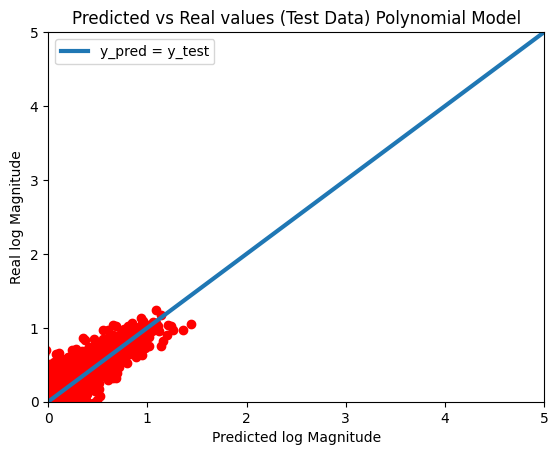

In [214]:
xs = np.linspace(0, 6, 400)
ys = np.linspace(0, 6, 400)
fig, ax = plt.subplots()
ax.scatter(y_pred, y_test, color='red')
ax.plot(xs, ys, label='y_pred = y_test', lw=3)
ax.set_xlabel('Predicted log Magnitude')
ax.set_ylabel('Real log Magnitude')
plt.title("Predicted vs Real values (Test Data) Polynomial Model")
ax.set_xlim(0, 5)
ax.set_ylim(0, 5)
ax.legend()

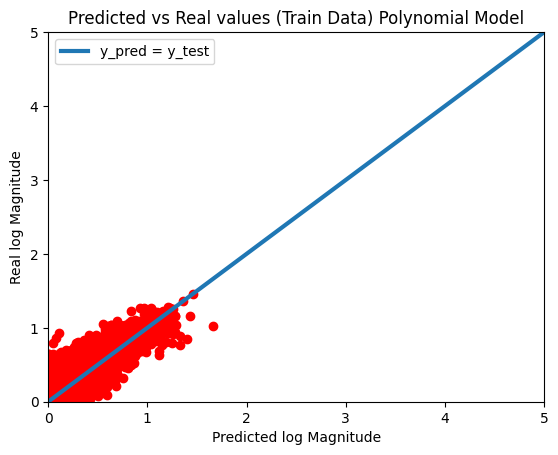

In [215]:
xs = np.linspace(0, 6, 400)
ys = np.linspace(0, 6, 400)
fig, ax = plt.subplots()
ax.scatter(train_pred, y_train, color='red')
ax.plot(xs, ys, label='y_pred = y_test', lw=3)
ax.set_xlabel('Predicted log Magnitude')
ax.set_ylabel('Real log Magnitude')
plt.title("Predicted vs Real values (Train Data) Polynomial Model")
ax.set_xlim(0, 5)
ax.set_ylim(0, 5)
ax.legend()

Ridge regression w/ normalisation

In [216]:
alphas = np.logspace(-6, 6, 13)

ridge_pipeline = make_pipeline(StandardScaler(), RidgeCV(alphas=alphas, store_cv_values=True))
ridge_pipeline.fit(X_train, y_train)

train_pred = ridge_pipeline.predict(X_train)
y_pred = ridge_pipeline.predict(X_test)

mse_test = mean_squared_error(y_test, y_pred)
mse_train = mean_squared_error(y_train, train_pred)
ridge_cv = ridge_pipeline.named_steps['ridgecv']

print(f'MAPE: {mean_absolute_pct_error(y_test, y_pred)}')
print(f'rootMean squared error train: {np.sqrt(mse_train)}')
print(f'rootMean squared error test: {np.sqrt(mse_test)}')
print("Best alpha:", ridge_cv.alpha_)

MAPE: 149.46440174366074
rootMean squared error train: 0.25332249431279696
rootMean squared error test: 0.2523926929063963
Best alpha: 10.0


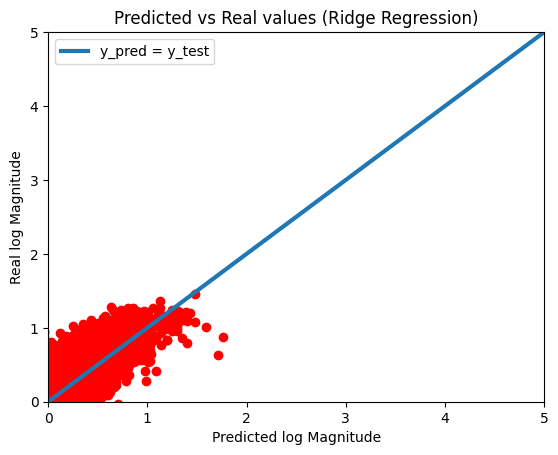

In [217]:
xs = np.linspace(0, 6, 400)
ys = np.linspace(0, 6, 400)
fig, ax = plt.subplots()
ax.scatter(train_pred, y_train, color='red')
ax.plot(xs, ys, label='y_pred = y_test', lw=3)
ax.set_xlabel('Predicted log Magnitude')
ax.set_ylabel('Real log Magnitude')
plt.title("Predicted vs Real values (Ridge Regression)")
ax.set_xlim(0, 5)
ax.set_ylim(0, 5)
ax.legend()

In [218]:
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV


In [225]:
from sklearn.model_selection import GridSearchCV
# alphas = np.logspace(-4, 4, 100)
# scaler = StandardScaler()
# lasso_cv = LassoCV(alphas=alphas, cv=5, random_state=42)
# X_train_scaled = scaler.fit_transform(x_train_poly)
# X_test_scaled = scaler.transform(x_test_poly)
# model_res, mse_train, mse_test, y_pred, y_test, y_train, train_pred  = runmodel(lasso_cv, X_train_scaled, y_train, X_test_scaled, y_test)
# # Fit model
# lasso_cv.fit(X_train, y_train)
# # Best lambda
# best_alpha = lasso_cv.alpha_
# print(f'Best Alpha: {best_alpha}')
# print(f'Mean squared error train: {mse_train}')
# print(f'Mean squared error test: {mse_test}')

In [220]:
from sklearn.preprocessing import PolynomialFeatures

polynomial_features = PolynomialFeatures(degree=2)
x_train_poly = polynomial_features.fit_transform(X_train)
x_test_poly = polynomial_features.fit_transform(X_test)

model_poly = LinearRegression(fit_intercept=False)
model_res, mse_train, mse_test, y_pred, y_test, y_train, train_pred  = runmodel(model_poly, x_train_poly, y_train, x_test_poly, y_test)
print(f'rootMean squared error train: {np.sqrt(mse_train)}')
print(f'rootMean squared error test: {np.sqrt(mse_test)}')

rootMean squared error train: 0.20166665463995004
rootMean squared error test: 3530.85799758295


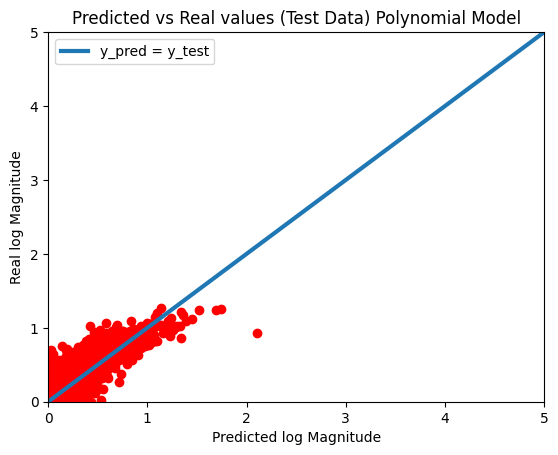

In [221]:
xs = np.linspace(0, 6, 400)
ys = np.linspace(0, 6, 400)
fig, ax = plt.subplots()
ax.scatter(y_pred, y_test, color='red')
ax.plot(xs, ys, label='y_pred = y_test', lw=3)
ax.set_xlabel('Predicted log Magnitude')
ax.set_ylabel('Real log Magnitude')
plt.title("Predicted vs Real values (Test Data) Polynomial Model")
ax.set_xlim(0, 5)
ax.set_ylim(0, 5)
ax.legend()

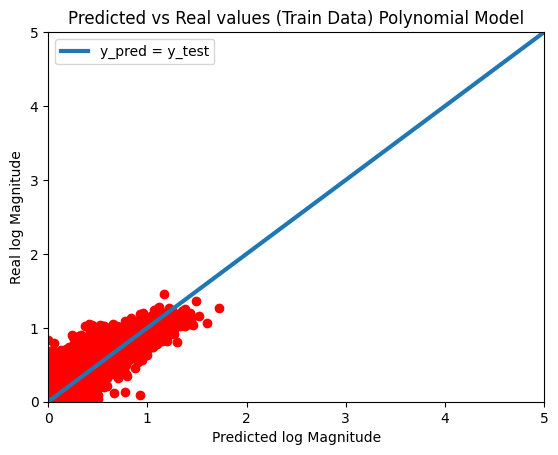

In [222]:
xs = np.linspace(0, 6, 400)
ys = np.linspace(0, 6, 400)
fig, ax = plt.subplots()
ax.scatter(train_pred, y_train, color='red')
ax.plot(xs, ys, label='y_pred = y_test', lw=3)
ax.set_xlabel('Predicted log Magnitude')
ax.set_ylabel('Real log Magnitude')
plt.title("Predicted vs Real values (Train Data) Polynomial Model")
ax.set_xlim(0, 5)
ax.set_ylim(0, 5)
ax.legend()

In [230]:
param_grid = {'ridge__alpha': np.logspace(-4, 4, 50)}
pipeline = make_pipeline(PolynomialFeatures(2), Ridge())
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='neg_mean_squared_error', verbose=1)


In [232]:
#alpha = 1.0
#ridge_model = Ridge(alpha=alpha)
model_res, mse_train, mse_test, y_pred, y_test, y_train, train_pred  = runmodel(grid_search, X_train, y_train, X_test, y_test)
print(f'rootMean squared error train: {np.sqrt(mse_train)}')
print(f'rootMean squared error test: {np.sqrt(mse_test)}')
print("Best alpha found: ", grid_search.best_params_['ridge__alpha'])
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))




Fitting 5 folds for each of 50 candidates, totalling 250 fits
rootMean squared error train: 0.2190164593009374
rootMean squared error test: 0.22047842361381753
Best alpha found:  109.85411419875572
Best cross-validation score: -0.05


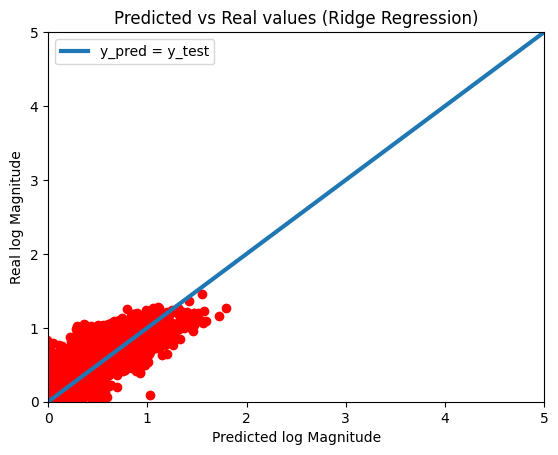

In [233]:
xs = np.linspace(0, 6, 400)
ys = np.linspace(0, 6, 400)
fig, ax = plt.subplots()
ax.scatter(train_pred, y_train, color='red')
ax.plot(xs, ys, label='y_pred = y_test', lw=3)
ax.set_xlabel('Predicted log Magnitude')
ax.set_ylabel('Real log Magnitude')
plt.title("Predicted vs Real values (Ridge Regression)")
ax.set_xlim(0, 5)
ax.set_ylim(0, 5)
ax.legend()

In [237]:


param_grid = {'ridge__alpha': [100]}
pipeline = make_pipeline(PolynomialFeatures(3), Ridge())
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='neg_mean_squared_error', verbose=1)

model_res, mse_train, mse_test, y_pred, y_test, y_train, train_pred  = runmodel(grid_search, X_train, y_train, X_test, y_test)
print(f'rootMean squared error train: {np.sqrt(mse_train)}')
print(f'rootMean squared error test: {np.sqrt(mse_test)}')
print("Best alpha found: ", grid_search.best_params_['ridge__alpha'])
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))



Fitting 5 folds for each of 1 candidates, totalling 5 fits
rootMean squared error train: 0.18781173403928209
rootMean squared error test: 0.2020446898159389
Best alpha found:  100
Best cross-validation score: -7.88
